In [9]:
# Basic imports
import os
import pandas as pd
import numpy as np
import cv2
import pytesseract
import re
from tqdm import tqdm

# Pima Indians Diabetes Dataset Analysis

This notebook analyzes the Pima Indians Diabetes dataset from Kaggle.

The dataset contains medical diagnostic measurements for Pima Indian women and whether they have diabetes.

**Key Features:**
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age in years
- Outcome: Class variable (0 or 1) - whether the person has diabetes

Let's load and explore the data.

In [10]:
pima_path =r"D:\Coding\VC\INFOSYS_SPRINGBOARD\ai_diet_planner\Datasets\diabetes.csv"

In [11]:

pima_df = pd.read_csv(pima_path)
pima_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
pima_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
pima_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
(pima_df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [16]:
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
pima_df[cols] = pima_df[cols].replace(0, np.nan)

pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [17]:
(pima_df == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [18]:
## Medical Lab Report Dataset - OCR Text Extraction

We are working with a medical lab report dataset that contains images of diagnostic reports. These images contain important medical information including test results, measurements, and clinical data.

Our next step is to apply **Optical Character Recognition (OCR)** to extract text from these images. This will allow us to:

- Convert image-based medical reports into machine-readable text
- Extract structured data such as test names, values, and reference ranges
- Automate the data collection process from physical or scanned lab reports
- Integrate the extracted information with our existing Pima Indians Diabetes dataset for enhanced analysis

We will use **Pytesseract**, a Python wrapper for Tesseract OCR, which is already imported in our notebook to perform this text extraction task.

SyntaxError: invalid syntax (1601811717.py, line 3)

In [27]:
!pip install easyocr

  Using cached easyocr-1.7.2-py3-none-any.whl.metadata (10 kB)
  Using cached torch-2.9.1-cp312-cp312-win_amd64.whl.metadata (30 kB)
  Using cached torchvision-0.24.1-cp312-cp312-win_amd64.whl.metadata (5.9 kB)
  Using cached scikit_image-0.26.0-cp312-cp312-win_amd64.whl.metadata (15 kB)
Using cached easyocr-1.7.2-py3-none-any.whl (2.9 MB)
Using cached torchvision-0.24.1-cp312-cp312-win_amd64.whl (4.3 MB)
Using cached torch-2.9.1-cp312-cp312-win_amd64.whl (110.9 MB)
Using cached scikit_image-0.26.0-cp312-cp312-win_amd64.whl (11.9 MB)

   ---------------------------------------- 0/4 [torch]
   ---------------------------------------- 0/4 [torch]
   ---------------------------------------- 0/4 [torch]
   ---------------------------------------- 0/4 [torch]
   ---------------------------------------- 0/4 [torch]
   ---------------------------------------- 0/4 [torch]
   ---------------------------------------- 0/4 [torch]
   ---------------------------------------- 0/4 [torch]
   --------

In [28]:
# Import easyocr
import easyocr

In [29]:
import cv2
import pandas as pd
import re
image_path = r"D:\Coding\VC\INFOSYS_SPRINGBOARD\ai_diet_planner\Datasets\lbmaske\AHD-0425-PA-0007719_E-REPORTS_250427_2032@E.pdf_page_7.png"

img = cv2.imread(image_path)

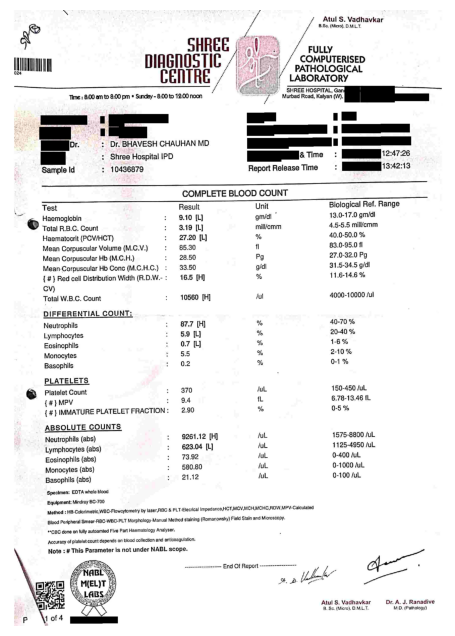

In [30]:
import matplotlib.pyplot as plt

img = cv2.imread(image_path)
if img is not None:
	img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
	plt.figure(figsize=(10, 8))
	plt.imshow(img_rgb)
	plt.axis('off')
	plt.show()
else:
	print(f"Error: Could not load image from {image_path}")
	print("Please verify the file path exists and is correct.")

In [31]:
# Initialize OCR reader
reader = easyocr.Reader(['en'])
results = reader.readtext(img)

print("Extracted Text:\n")
for detection in results:
    bbox, text, confidence = detection
    print(f"{text} (Confidence: {confidence:.2f})")

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Extracted Text:

Atul S. Vadhavkar (Confidence: 0.71)
B.Sc (Micro) DMLT (Confidence: 0.73)
SHRGE (Confidence: 0.52)
FULLY (Confidence: 1.00)
diAgnostIC (Confidence: 0.20)
COMPUTERISED (Confidence: 1.00)
PATHOLOGICAL (Confidence: 1.00)
024 (Confidence: 1.00)
CGnTRE (Confidence: 0.71)
LABORATORY (Confidence: 0.69)
SHREE HOSPITAL, Gan (Confidence: 0.69)
Tme : BOan t 800pm (Confidence: 0.32)
sundy- 8,00 t 120nn (Confidence: 0.55)
Murbad Road; Kalyan (W): (Confidence: 0.75)
Dr_ (Confidence: 0.71)
Dr. BHAVESH CHAUHAN MD (Confidence: 0.81)
Shree Hospital IPD (Confidence: 1.00)
Time (Confidence: 0.99)
12*47.26 (Confidence: 0.66)
Sample Id (Confidence: 0.99)
10436879 (Confidence: 0.98)
Report Release Time (Confidence: 0.80)
13.42:13 (Confidence: 0.49)
COMPLETE BLOOD COUNT (Confidence: 0.96)
Test (Confidence: 1.00)
Result (Confidence: 1.00)
Unit (Confidence: 1.00)
Biological Ref. Range (Confidence: 0.90)
Haemoglobin (Confidence: 1.00)
9.10 [L] (Confidence: 0.93)
13.0-17.0 (Confidence: 1.00)
Tota

In [32]:
!pip install pytesseract opencv-python pillow pandas

In [33]:
import cv2
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt


(np.float64(-0.5), np.float64(1655.5), np.float64(2338.5), np.float64(-0.5))

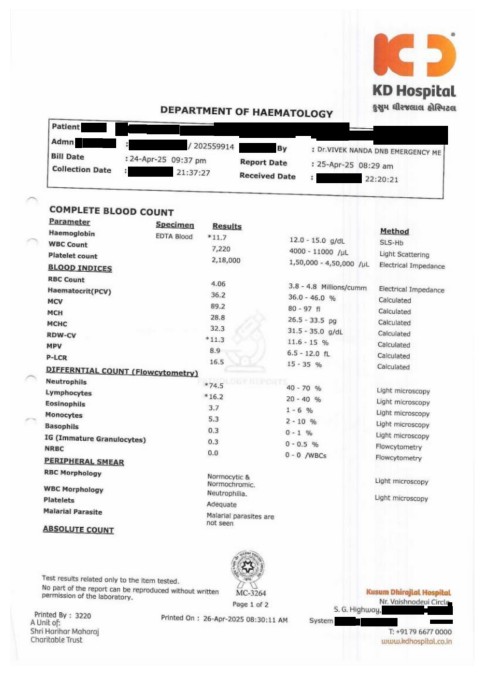

In [35]:
image_path = r"D:\Coding\VC\INFOSYS_SPRINGBOARD\ai_diet_planner\Datasets\lbmaske\BLR-0425-PA-0041664_ef7835c4565245d6afdb7d905cf4d4a1_27-04-2025_0520-51_PM@E.pdf_page_14.png"

img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,10))
plt.imshow(img_rgb)
plt.axis("off")


(np.float64(-0.5), np.float64(1655.5), np.float64(2338.5), np.float64(-0.5))

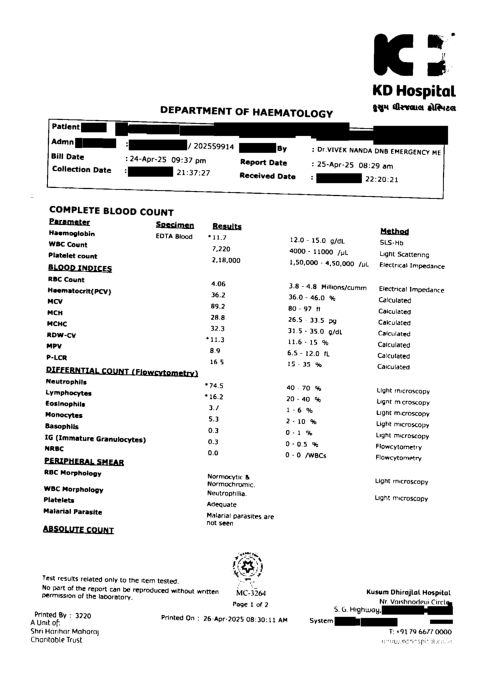

In [36]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Light thresholding to preserve table lines & alignment
gray = cv2.threshold(
    gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)[1]

plt.figure(figsize=(6,10))
plt.imshow(gray, cmap="gray")
plt.axis("off")

In [38]:
# Use easyocr which is already initialized
results = reader.readtext(gray)

# Extract and print text
print("Extracted Text from Medical Report:\n")
extracted_text = "\n".join([detection[1] for detection in results])
print(extracted_text)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Extracted Text from Medical Report:

K
KD Hospital
DEPARTMENT OF HAEMATOLOGY
devalcl Qea
Patlent|
Admn]

202559914
Dr.VIVEK NANDA DNB EMERGENCY
ME
Bill Date
24-Apr-25
09:37 pm
Report Date
25-Apr-25 08:29 am
Collection Date
21:37.27
Received Date
22:20:21
COMPLETE BLOOD COUNT
Parameter
Specimen
Besults
Haemoplobin
EOTA Blood
1.7
Methed
WBC Count
12.0
15.0
g/dL
SLS-Hb
7,220
4000
M1000
(pL
Platelet count
Lignt Scattering
2,18,000
1,50,000
4,50,000
IuL
Eicctrical
BLQORINDICES
Impedance
RBC Count
4.06
3.8
4.8 Millons/cumm
Electrical
Haematocrlt(PCV)
36.2
Impedance
MCV
36.0
46.0
%
Calculated
89.2
80
97
fI
McH
Catculated
28,8
26.5
33.5
MCHC
09
Calculated
32.3
31,5
35.0 Q/dl
Calculated
RDW-Cv
11.3
11.6
15
9
MPv
Calculated
P-Lcr
6.5 - 12.0
fL
Calculated
16 5
15 . JS
%
DIFFERNTIAL CQUNT (Elqwcytometry)
Caiculated
Neutrophlls
*74.5
40 -
70
%
Llght rnicroscopy
Lymphocytes
16.2
20 -
40
4
Eoslnophlls
Lignt
m
croscopy
3,7
1 - 6 %
Monocytes
Lignt microscopy
5.3
2 - 10
%6
Basophlls
Llght microscopy
0.3

In [40]:

import pandas as pd

structured_data = [
    {
        "Test Name": "Haemoglobin",
        "Result": 11.7,
        "Unit": "g/dL",
        "Reference Range": "12.0 - 15.0"
    },
    {
        "Test Name": "WBC Count",
        "Result": 7220,
        "Unit": "/uL",
        "Reference Range": "4000 - 11000"
    },
    {
        "Test Name": "Platelet Count",
        "Result": 218000,
        "Unit": "/uL",
        "Reference Range": "150000 - 450000"
    },
    {
        "Test Name": "Neutrophils",
        "Result": 74.5,
        "Unit": "%",
        "Reference Range": "40 - 70"
    },
    {
        "Test Name": "Lymphocytes",
        "Result": 16.2,
        "Unit": "%",
        "Reference Range": "20 - 40"
    }
]

df = pd.DataFrame(structured_data)
df

,Test Name,Result,Unit,Reference Range
0,Haemoglobin,11.7,g/dL,12.0 - 15.0
1,WBC Count,7220.0,/uL,4000 - 11000
2,Platelet Count,218000.0,/uL,150000 - 450000
3,Neutrophils,74.5,%,40 - 70
4,Lymphocytes,16.2,%,20 - 40
